# Individual Image Analyses

Compare answers for different face identities

### import modules

In [1]:
import json
import pickle

import numpy as np
import pandas as pd

from sklearn import preprocessing, manifold

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

### get settings

In [2]:
with open('../references/my_settings.json', 'r') as fp:
    settings_dict = json.load(fp)

my_order = settings_dict['my_order']

with open('../models/palette.pkl', 'rb') as fp:
    color_palette = pickle.load(fp)

### get answer data

In [3]:
ans_data_df = pd.read_csv('../data/interim/clean_big_df.tsv', sep='\t', index_col=[0], header=[0, 1, 2, 3])
ans_data_df.tail()

Full                                                                   \
     Answer                                                                    
      Angry                                                                    
       AF01   AF05   AF07   AF14   AF30   AM02     AM04   AM06   AM23   AM32   
p228  Angry  Angry  Angry  Angry  Angry  Angry    Angry  Angry  Angry  Angry   
p230  Angry  Angry  Angry  Angry  Angry  Angry  Fearful  Angry  Angry  Angry   
p231  Angry  Angry  Angry  Angry  Angry  Angry    Angry  Angry  Angry  Angry   
p232  Angry    Sad  Angry  Angry  Angry  Angry    Angry  Angry  Angry  Angry   
p233  Angry  Angry  Angry  Angry  Angry  Angry    Angry  Angry  Angry  Angry   

      ...     Upper                                               
      ...     upper                                               
      ... Surprised                                               
      ...      AF01 AF05 AF07 AF14 AF30 AM02 AM04 AM06 AM23 AM32  
p228  ...         3    2    3    2    2    4    2   10    3    3  
p230  ...         2    5    2    4    2    4    2    4    2    3  
p231  ...         6    2    8    4    4    4    6    9    4    5  
p232  ...         5    4    4    2    3    2    4    3    4    3  
p233  ...         4    3    4    4    6    4    7    5    4    4  

[5 rows x 840 columns]

Only labels with Answers given

In [4]:
ans_df = ans_data_df.xs('Answer', level=1, axis=1)
ans_df.tail()

Full                                                                   \
      Angry                                                                    
       AF01   AF05   AF07   AF14   AF30   AM02     AM04   AM06   AM23   AM32   
p228  Angry  Angry  Angry  Angry  Angry  Angry    Angry  Angry  Angry  Angry   
p230  Angry  Angry  Angry  Angry  Angry  Angry  Fearful  Angry  Angry  Angry   
p231  Angry  Angry  Angry  Angry  Angry  Angry    Angry  Angry  Angry  Angry   
p232  Angry    Sad  Angry  Angry  Angry  Angry    Angry  Angry  Angry  Angry   
p233  Angry  Angry  Angry  Angry  Angry  Angry    Angry  Angry  Angry  Angry   

      ...      Upper                                                         \
      ...  Surprised                                                          
      ...       AF01       AF05       AF07       AF14       AF30       AM02   
p228  ...  Surprised  Surprised  Surprised  Surprised  Surprised      Angry   
p230  ...    Fearful  Surprised  Surprised  Surprised  Surprised  Surprised   
p231  ...  Surprised  Surprised  Surprised  Surprised  Surprised  Surprised   
p232  ...  Surprised        Sad  Surprised  Surprised  Surprised  Surprised   
p233  ...    Fearful  Surprised  Surprised  Surprised  Surprised  Surprised   

                                                  
                                                  
           AM04       AM06       AM23       AM32  
p228    Fearful  Surprised    Fearful  Surprised  
p230  Surprised  Surprised  Surprised  Surprised  
p231  Surprised  Surprised  Surprised  Surprised  
p232  Surprised  Surprised  Surprised  Surprised  
p233  Surprised  Surprised  Surprised  Surprised  

[5 rows x 210 columns]

### get prediction data

In [5]:
pred_data_df = pd.read_csv('../data/processed/big_pred_CUTUP_df.tsv', sep='\t', index_col=[0], header=[0, 1, 2, 3])
pred_data_df.tail()

Full                          \
                           Angry                           
                           Angry                           
                            AF01                    AF05   
p228    ('Fearful', 'Disgusted')    ('Fearful', 'Angry')   
p230  ('Surprised', 'Surprised')  ('Neutral', 'Neutral')   
p231          ('Angry', 'Angry')      ('Angry', 'Angry')   
p232          ('Angry', 'Angry')                     NaN   
p233          ('Happy', 'Happy')    ('Fearful', 'Angry')   

                                                      \
                                                       
                                                       
                          AF07                  AF14   
p228      ('Neutral', 'Angry')    ('Angry', 'Angry')   
p230  ('Surprised', 'Fearful')  ('Fearful', 'Angry')   
p231        ('Angry', 'Angry')  ('Angry', 'Fearful')   
p232        ('Angry', 'Angry')    ('Angry', 'Angry')   
p233        ('Angry', 'Angry')    ('Angry', 'Angry')   

                                                              \
                                                               
                                                               
                            AF30                        AM02   
p228              ('Sad', 'Sad')      ('Neutral', 'Fearful')   
p230  ('Surprised', 'Surprised')  ('Surprised', 'Surprised')   
p231            ('Angry', 'Sad')  ('Disgusted', 'Surprised')   
p232        ('Fearful', 'Angry')          ('Angry', 'Angry')   
p233          ('Angry', 'Happy')          ('Angry', 'Angry')   

                                                        \
                                                         
                                                         
                      AM04                        AM06   
p228  ('Sad', 'Disgusted')        ('Neutral', 'Angry')   
p230                   NaN    ('Surprised', 'Fearful')   
p231      ('Angry', 'Sad')  ('Disgusted', 'Surprised')   
p232      ('Angry', 'Sad')          ('Angry', 'Angry')   
p233    ('Angry', 'Angry')          ('Neutral', 'Sad')   

                                                        ...   Upper            \
                                                        ... Fearful       Sad   
                                                        ...   Angry Surprised   
                        AM23                      AM32  ...    AF14      AF01   
p228    ('Fearful', 'Angry')      ('Fearful', 'Angry')  ...     NaN       NaN   
p230  ('Fearful', 'Fearful')  ('Surprised', 'Fearful')  ...     NaN       NaN   
p231      ('Angry', 'Angry')      ('Fearful', 'Angry')  ...     NaN       NaN   
p232      ('Angry', 'Angry')        ('Angry', 'Angry')  ...     NaN       NaN   
p233  ('Neutral', 'Neutral')      ('Fearful', 'Angry')  ...     NaN       NaN   

                                                                              \
     Angry                               Sad                                   
     Happy Disgusted                   Angry Surprised               Fearful   
      AF05      AF07                    AF30      AF05                  AM02   
p228   NaN       NaN                     NaN       NaN                   NaN   
p230   NaN       NaN                     NaN       NaN                   NaN   
p231   NaN       NaN                     NaN       NaN                   NaN   
p232   NaN       NaN                     NaN       NaN  ('Fearful', 'Angry')   
p233   NaN       NaN  ('Happy', 'Surprised')       NaN                   NaN   

                                                                  
                   Fearful           Neutral           Surprised  
                 Disgusted             Angry               Happy  
                      AM06              AM06                AF05  
p228                   NaN               NaN                 NaN  
p230                   NaN               NaN                 NaN  
p231                   NaN   

In [6]:
# irrespective of answer
pred_df = pred_data_df.groupby(level=[0, 1, 3], axis=1).first()
# only image prediction
pred_df =pred_df.applymap(lambda x:eval(x)[0] if x != None else None)
pred_df.tail()

Full                                                              \
          Angry                                                               
           AF01     AF05       AF07     AF14       AF30       AM02     AM04   
p228    Fearful  Fearful    Neutral    Angry        Sad    Neutral      Sad   
p230  Surprised  Neutral  Surprised  Fearful  Surprised  Surprised  Neutral   
p231      Angry    Angry      Angry    Angry      Angry  Disgusted    Angry   
p232      Angry    Angry      Angry    Angry    Fearful      Angry    Angry   
p233      Happy  Fearful      Angry    Angry      Angry      Angry    Angry   

                                     ...      Upper                        \
                                     ...  Surprised                         
           AM06     AM23       AM32  ...       AF01       AF05       AF07   
p228    Neutral  Fearful    Fearful  ...  Surprised  Surprised  Surprised   
p230  Surprised  Fearful  Surprised  ...      Happy    Neutral    Neutral   
p231  Disgusted    Angry    Fearful  ...    Neutral    Neutral    Neutral   
p232      Angry    Angry      Angry  ...  Surprised  Surprised  Surprised   
p233    Neutral  Neutral    Fearful  ...      Happy    Neutral      Angry   

                                                                        \
                                                                         
           AF14       AF30       AM02       AM04       AM06       AM23   
p228    Neutral  Surprised  Surprised    Neutral  Surprised  Surprised   
p230    Neutral      Happy    Neutral    Neutral  Surprised      Happy   
p231  Surprised  Surprised  Surprised    Neutral  Surprised  Surprised   
p232  Surprised  Surprised    Neutral  Surprised  Surprised    Neutral   
p233    Neutral       None    Neutral    Neutral  Surprised      Happy   

                 
                 
           AM32  
p228  Surprised  
p230    Neutral  
p231  Surprised  
p232  Surprised  
p233    Fearful  

[5 rows x 210 columns]

### make count of how often the true emo was chosen

In [7]:
def make_true_df(cond, ans_df, my_order=my_order):

    cond_df = ans_df.loc[:, cond]

    d = {}

    for true_emo, indi in cond_df.columns:

        these_data = cond_df.loc[:, (true_emo, indi)]

        for emo in my_order:
            
            correct_data = these_data == emo
            d[(true_emo, emo, indi)] = correct_data.mean()

    true_df = pd.DataFrame(d, index=['mean']).T.unstack(1)['mean']
    true_df = true_df.loc[my_order, my_order]
    
    return true_df

#### check if answers sum up to 1

For answers

In [8]:
for cond in ans_df.columns.levels[0]:
    this_df = make_true_df(cond, ans_df)
    print(cond, this_df.sum(axis=1).min(), this_df.sum(axis=1).max() )

Full 0.9999999999999999 1.0
Lower 0.9999999999999999 1.0
Upper 0.9999999999999999 1.0000000000000002


For predictions

In [9]:
for cond in pred_df.columns.levels[0]:
    this_df = make_true_df(cond, pred_df)
    print(cond, this_df.sum(axis=1).min(), this_df.sum(axis=1).max() )

Full 0.9999999999999999 1.0000000000000002
Lower 0.8366336633663367 1.0
Upper 0.8465346534653464 1.0


### plot for all masking conditions

In [10]:
def make_ax(df, n, ax):
    
    this_df = make_true_df(cond, df)

    sns.heatmap(this_df.T, square=True, vmin=0, vmax=1, cmap=color_palette, cbar=False, ax=ax)

    ax.set_title(cond, fontsize=24, y=1.02)
    ax.set_xlabel('')

    step_size=10
    for i in range(0, 71, step_size):
        ax.axvline(i, color='white', linewidth=5)

    if n<2:
        ax.set_xticks([])

    else:
        my_ticks = this_df.index.get_level_values(1)
        ax.set_xticks(np.arange(len(my_ticks))+0.5, my_ticks)

        x_str = ''
        n_empty = 35

        for i in this_df.index.get_level_values(0)[::step_size]:
            x_str += (str(i) + ' '*n_empty)[:n_empty]

        x_str = x_str.strip()
        ax.set_xlabel(x_str, y=-1)
    
    return ax

In [11]:
conds = ans_df.columns.levels[0]

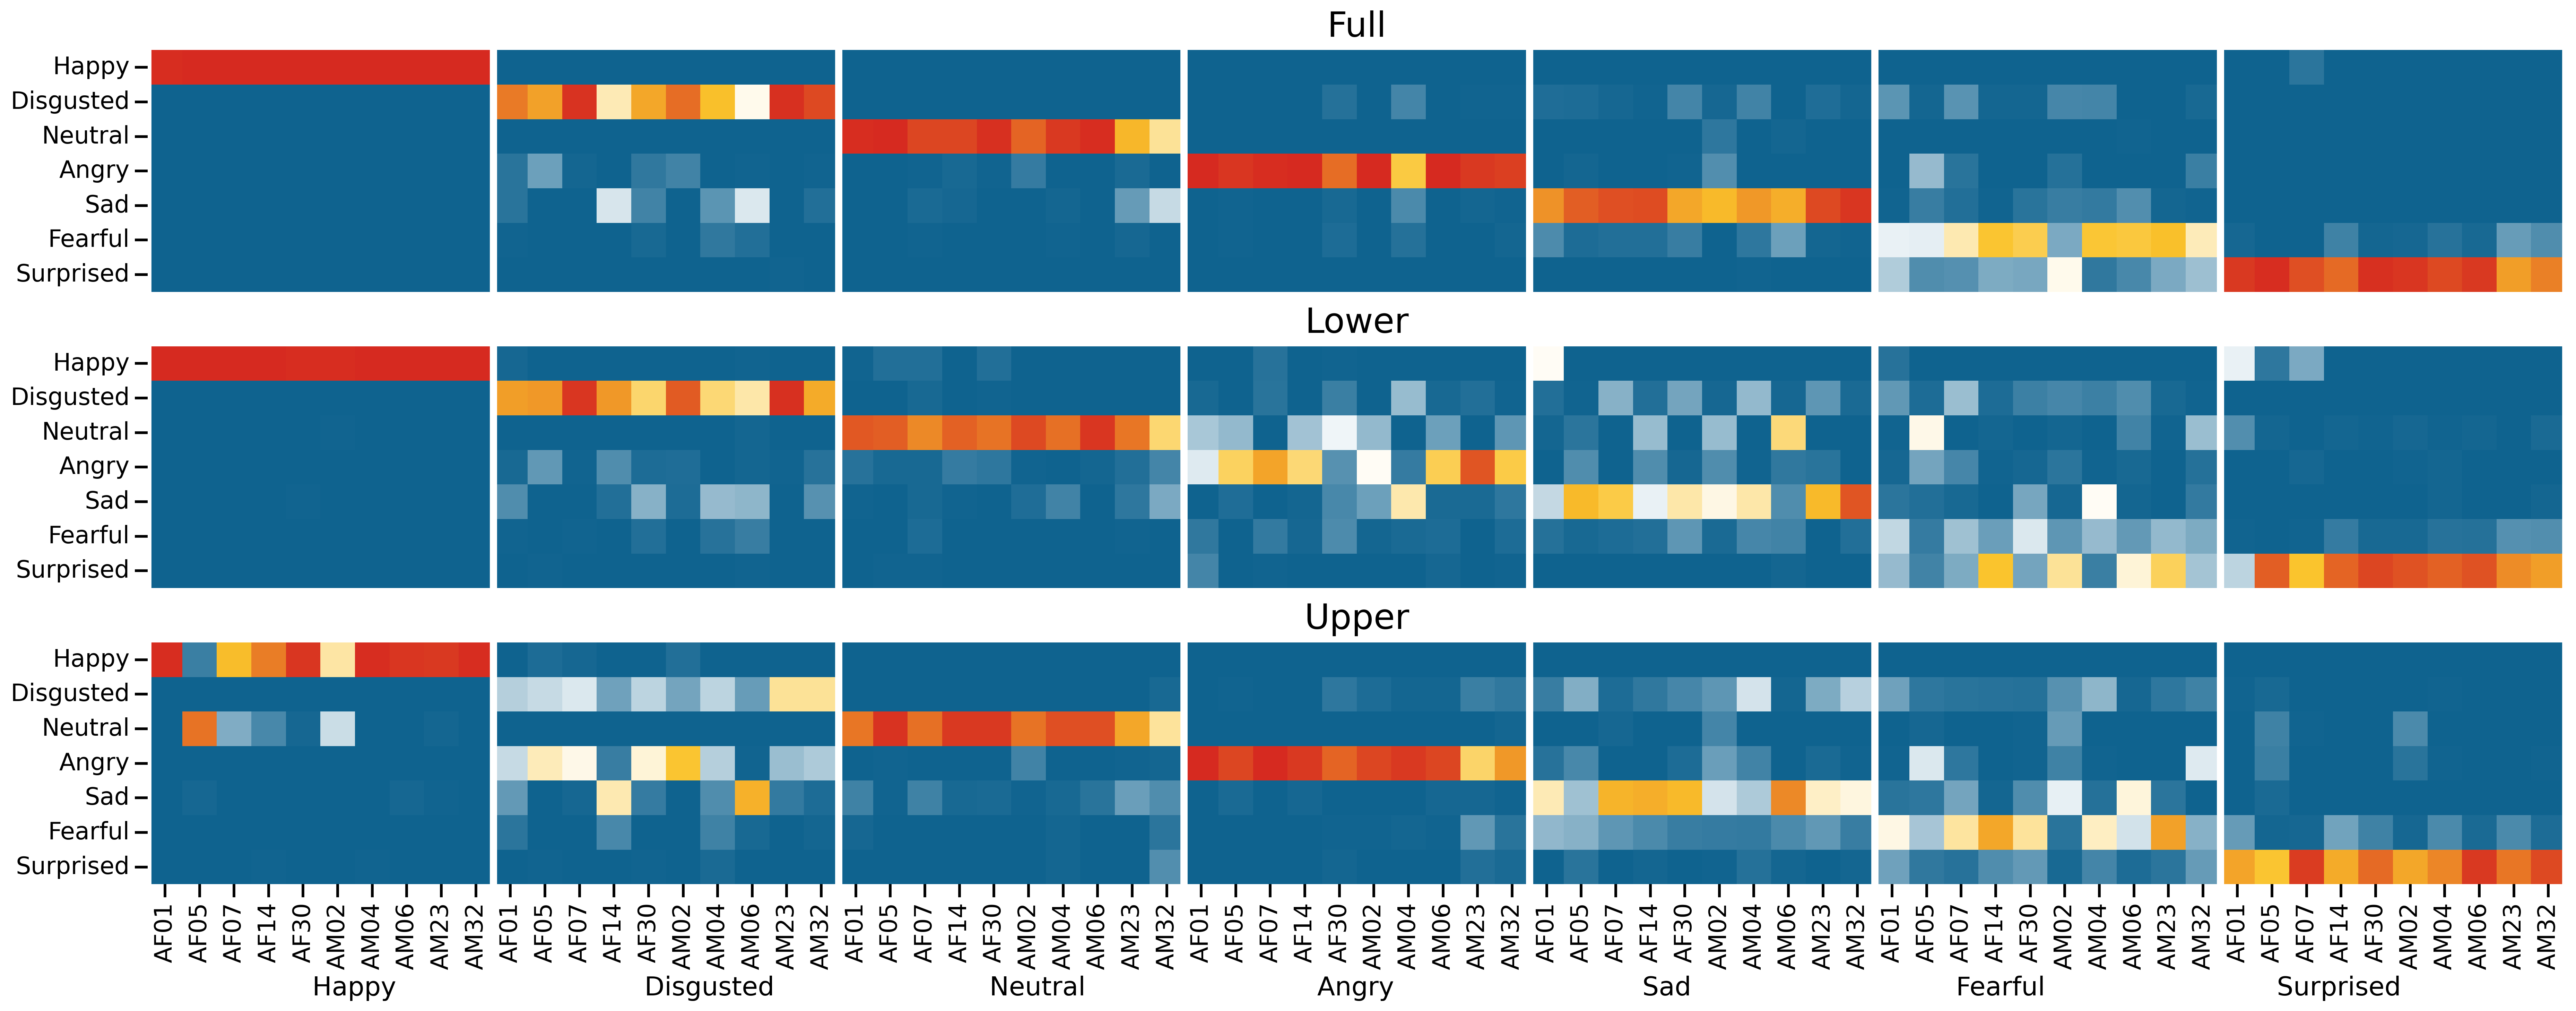

In [12]:
fig = plt.figure(figsize=(30, 22), dpi=300)

for n, cond in enumerate(conds):
    ax = plt.subplot(len(conds)*2, 1, n+1)
    make_ax(ans_df, n, ax)

plt.savefig('../reports/figures/ans_indi_fig.png', bbox_inches='tight')
plt.show()

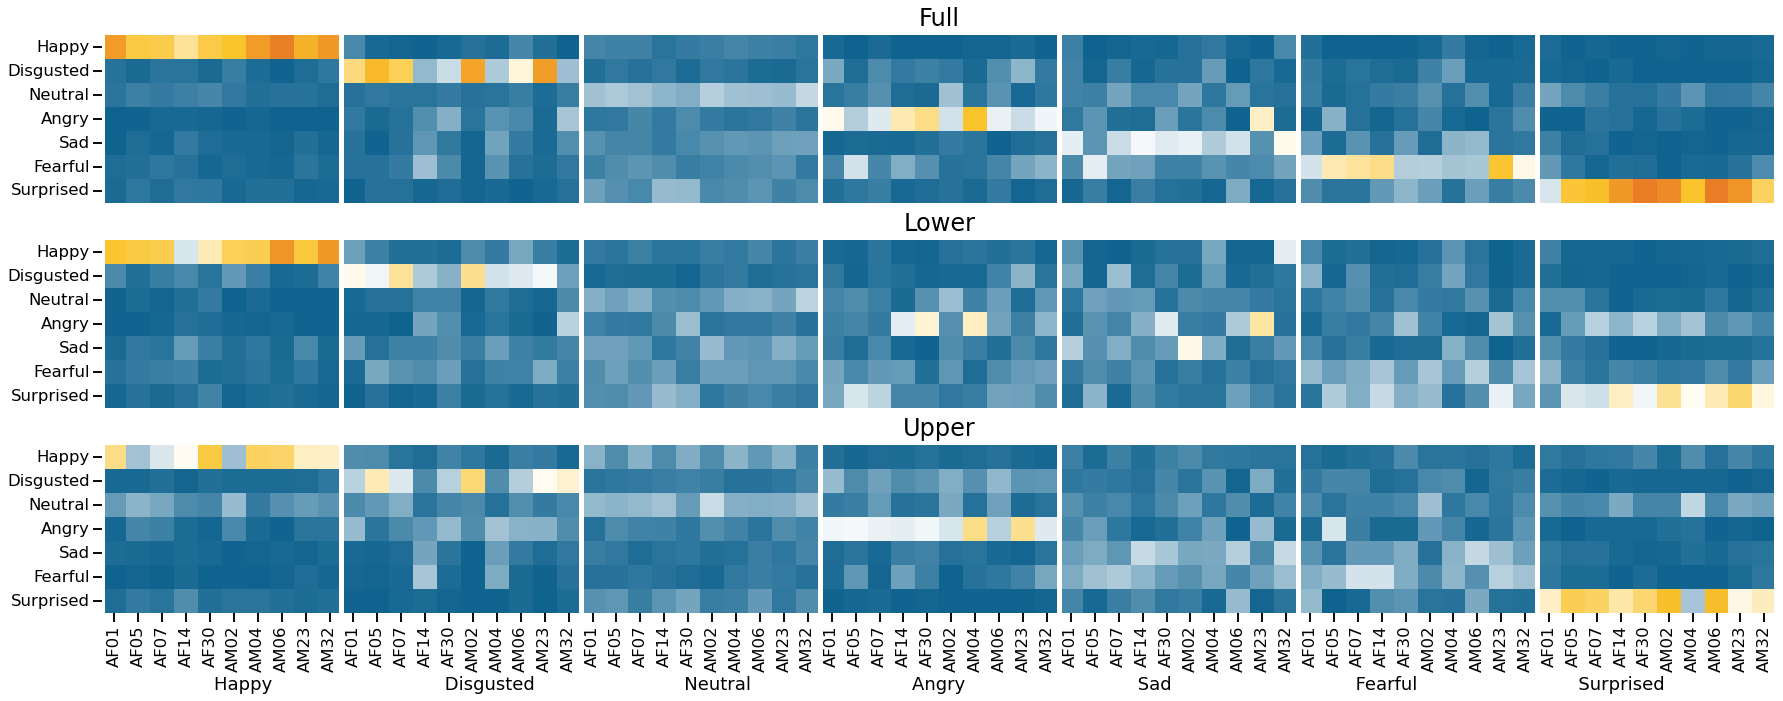

In [13]:
fig = plt.figure(figsize=(30, 22))

for n, cond in enumerate(conds):
    ax = plt.subplot(len(conds)*2, 1, n+1)
    make_ax(pred_df, n, ax)

plt.savefig('../reports/figures/pred_indi_fig.png', bbox_inches='tight')
plt.show()